In [1]:
import sys
import copy
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom
from classes.optimizers.metropol import Metropol
from classes.optimizers.random_struct_search import Random_Searcher
from classes.descriptors import DistanceMoments
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [8]:
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)
atom_cols = [Atom_Collection([Atom(position=pos, size=20) for pos in poses]) for poses in positions]
dist_mom = DistanceMoments(color="C4")

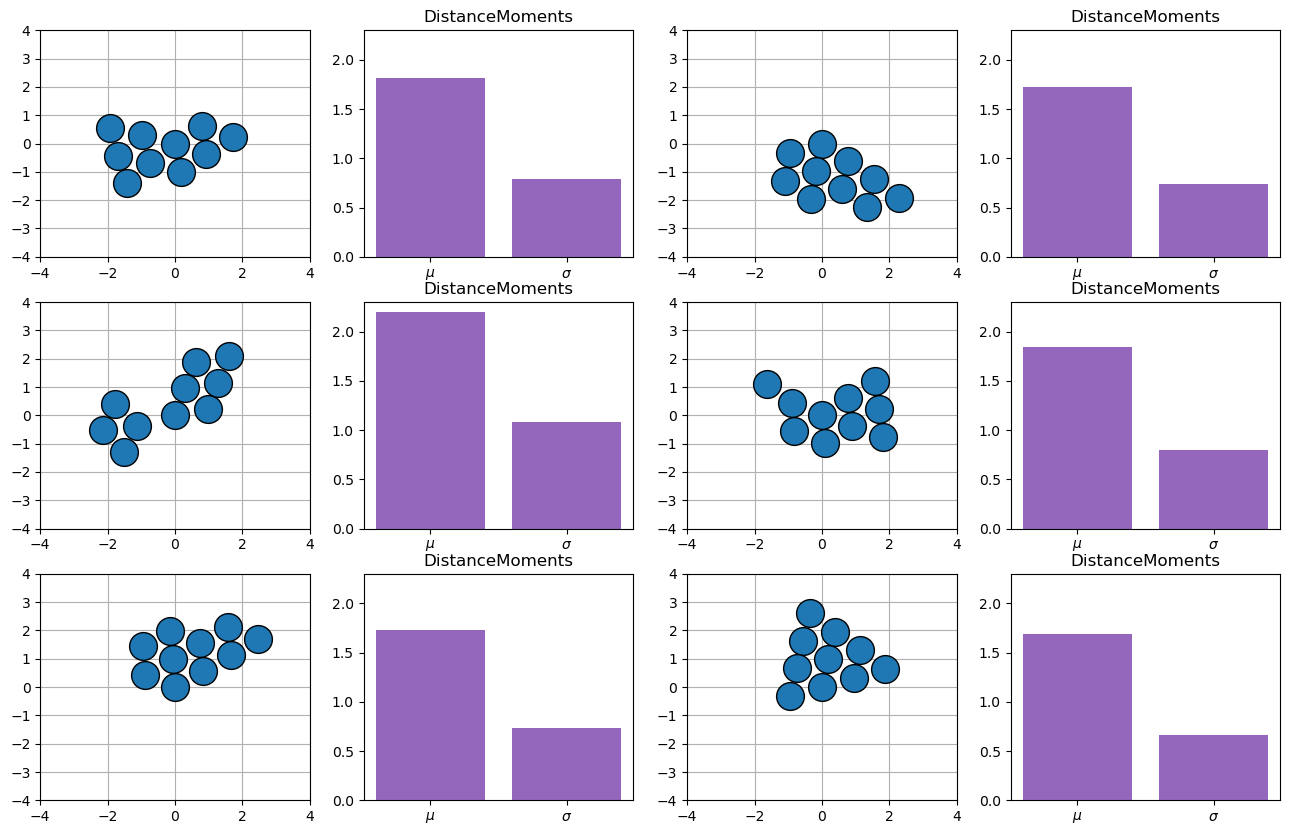

In [9]:
fig, axs = plt.subplots(3,4, figsize=(16,10))
j = 0
for i in [0, 2]:
    for ax1, ax2 in zip(axs[:,i], axs[:,i+1]):
        ax1.set_xlim([-4,4])
        ax1.set_ylim([-4,4])
        ax1.grid()
        dist_mom.plot(atom_col=atom_cols[j], ax=ax2)
        atom_cols[j].plot(ax=ax1)
        j+=1

38


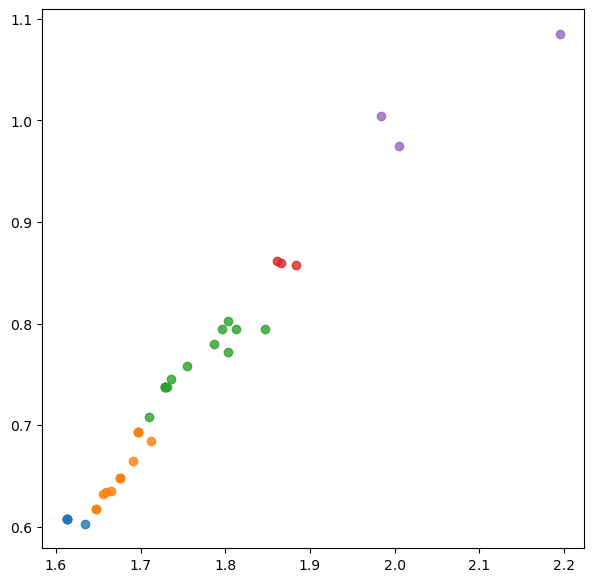

In [10]:
descriptors = np.array([dist_mom.get_descriptor(atom_col=atom_col) for atom_col in atom_cols])
print(len(descriptors))
bin_sizes=[0.02,0.09,0.12,0.1,0.2,0.1, 0.1]#(max(descriptors[:,1])-min(descriptors[:,1]))/7.0
#print(bin_size)
min_val = min(descriptors[:,1])
fig, ax = plt.subplots(figsize=(7,7))
atom_cols_sorted = {}
upper_bound = min_val-0.01
lower_bound = min_val-0.01
for i, bin_size in enumerate(bin_sizes):#range(7):
    atom_cols_sorted[i] = []
    upper_bound+=bin_size
    indices_low = np.argwhere(descriptors[:,1] > lower_bound)
    indices_high = np.argwhere(descriptors[:,1] <=  upper_bound)
    lower_bound+=bin_size
    indices = []
    #print(upper_bound, lower_bound)
    for index_low in indices_low:
        if index_low in indices_high:
            indices.append(index_low)

    for index in indices:
        atom_cols_sorted[i].append(atom_cols[index[0]])
        ax.plot(descriptors[:,0][index], descriptors[:,1][index], 'o', color=f"C{i}",alpha=0.8)

(-5.0, 55.0)

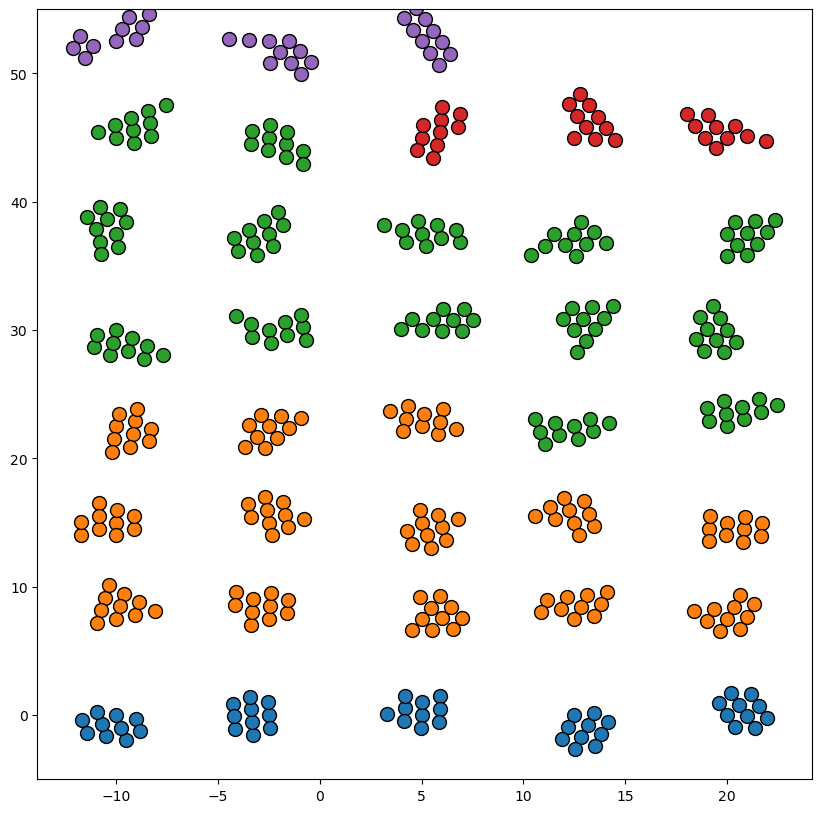

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

i = 0
disp_vector = np.array([-10.0, 0.0])
for cluster in atom_cols_sorted:
    for atom_col in atom_cols_sorted[cluster]:
        atom_col.set_sizes([10.0 for i in range(len(atom_col))])
        atom_col.reset_plot_axes()
        atom_col.set_colors([f"C{cluster}" for i in range(len(atom_col))])
        for atom in atom_col:
            #pass
            atom.move(disp_vector)
        #atom_col.get_positions()
        atom_col.plot(ax=ax)
        for atom in atom_col:
            #pass
            atom.move(-disp_vector)
        i+=1
        if i % 5 == 0:
            #print(i)
            disp_vector[1]+=7.5
            disp_vector[0]=-10.0
        else:
            disp_vector[0]+=7.5
ax.set_ylim(-5.0,55)